# Swap Gate

This program simulates a Swap gate. \
Author: Šimon Mařík \
Time: 12.8.2025 \
Note: Ensure you have installed the requirements.txt or environment.yml before running this

## 1. Introduction
The Swap Gate is a fundamental quantum gate that performs very simple action - it swaps values of two different qubits. 

The matrix for this gate is
$$
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix}
$$



## 2.Example initial state
For this example, we will set the value of qubit 0 to |1> and the value of qubit 1 to |0>. We can think about the two qubits as two vectors. Qubit zero has value of |1>, so it has vector
$$
\begin{bmatrix}
0\\
1 
\end{bmatrix}
$$

and the qubit one is set to |0>, thus its vector is
$$
\begin{bmatrix}
1\\
0 
\end{bmatrix}
$$

 Every combination of qubits has it own one common vector, that we need to explain this gate properly. In this case we get 4-dimensional vector, because we are combining 2 2-dimensionals vectors. The final vector is tensor product of previous state vectors, so 

 \begin{bmatrix}
0\\
0\\
1\\
0
\end{bmatrix}

## 3. Using the gate - math
Using the gate can be represented by multiplying the vector (matrix) of the qubits by the gate matrix.
$$
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix}
\cdot
 \begin{bmatrix}
0\\
0\\
1\\
0
\end{bmatrix}
=
 \begin{bmatrix}
0\\
1\\
0\\
0
\end{bmatrix}

$$

So as we can can see, the bit essentially swapped. When we rewrite this to vectors for each qubit specificaly, we get
$$
\begin{bmatrix}
1\\
0
\end{bmatrix}
$$

and the qubit one is set to |0>, thus its vector is
$$
\begin{bmatrix}
0\\
1
\end{bmatrix}
$$

Now the value of qubit zero is set to |0> and value of qubit one is |1>, so the values essentially swapped, as the name implies.

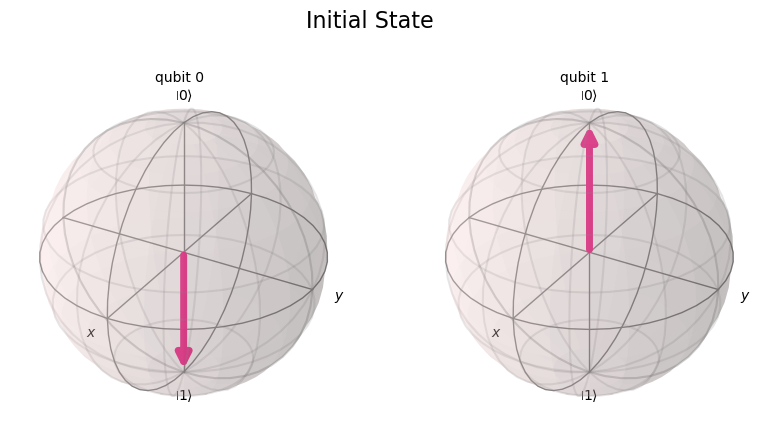

In [37]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qreg_q = QuantumRegister(1, 'q')
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)
circuit.x(qreg_q[0])
plot_bloch_multivector(Statevector(circuit), title="Initial State")

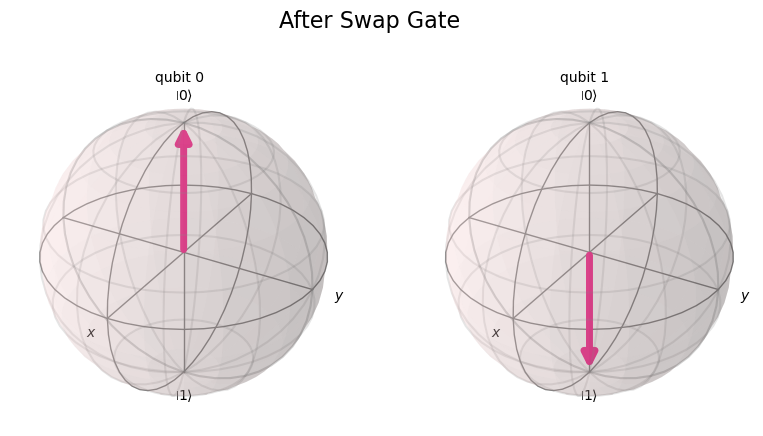

In [38]:
circuit.swap(qreg_q[0], qreg_q[1])
plot_bloch_multivector(Statevector(circuit), title="After Swap Gate")

In [39]:
Statevector(circuit).draw("latex")

<IPython.core.display.Latex object>

In [40]:
circuit.measure(qreg_q[0], creg_c[0])

sim = AerSimulator(shots=5000)
result = sim.run(circuit).result()

print("Qbit 0 results: " + str(result.get_counts(circuit)))

circuit.measure(qreg_q[1], creg_c[0])

sim = AerSimulator(shots=5000)
result = sim.run(circuit).result()

print("Qbit 1 results: " + str(result.get_counts(circuit)))

Qbit 0 results: {'0': 5000}
Qbit 1 results: {'1': 5000}
